# Figure 3 Replication

This page contains the code to replicate Figure 3 in the paper which shows captured 'profits.' 

A legal non-profit cannot distribute profits but, following the literature, we assume the commercial non-profit distributes 'captured profits' in the form of perquisites or other benefits to its directors.  

Hybrid firms are for-profit firms with social-investors (e.g. mission-oriented non-profit shareholders in a for-profit microfinance firm)

## Code

Several functions used can be found in the python module [Contract.py](Contract.py)

In [2]:
import Contract

Code below uses this module to produce Figure 1.  Code is hidden in HTML view. Click button to display.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
plt.rcParams['figure.figsize'] = 10, 8
np.set_printoptions(precision=2) 

**Commercial non-profits/hybrid ownership**

Parameter $\alpha$ summarizes the degree of 'hybridity' or non-profit orientation. 
- $\alpha=1$: a pure for-profit firm where 100 percent of the raw profits can be captured and distributed by owner/shareholders.

- $\alpha=0$: pure non-profit. No profits can be captured and distributed for the benefit of owners. 

- $0 < \alpha=0 < 1$: Hybrid ownership firm.  A non-profit where fraction $\alpha$ of raw profits are captured (e.g. indirectly via perquisites and other benefits) or a hybrid ownership firm (e.g. B-corporation or a for-profit that has significant non-profit shareholders, as is quite common in modern microfinance).

A 'pure' for profit (with $\alpha$=1.0) earns a reduced (possibly negative) profit due to it's inability to commit. Seen in the plot as profits the height of the horizontal line.

Any non-profit with $\alpha$ above about 0.4 and below 1.0 can better commit to not renegotiate a larger set of contracts and therefore can offer a more profitable renegotiation-proof contract. Even though they capture only fraction $\alpha$ of those profits, the take home profits exceed the profits of the pure for-profit. 

THe no-renegotiation constraint is:

$$
\alpha\Pi_{1}(C_{1}^{m1}(C_{1});C_{1})\leq\eta(\alpha)
$$

We will illustrate with a 'non-pecuniary' sanction (e.g. guilt or mission-drift penalty)

$$
\eta(\alpha) = B \cdot (1 - \alpha)
$$

Where $B$ is a constant, for example $B = \bar \kappa$

This implies that the managers/board of a pure for-profit firm feel no non-pecuniary sanction at renegotiating a contract but a firm of type $\alpha <1$ does incur a sanction for breaching commitments they'd made in period 0.  This then implies that we can now write the no-renegotiation constraint as:

$$
\Pi_{1}(C_{1}^{m1}(C_{1});C_{1})\leq  \kappa(\alpha) 
$$

where $\kappa(\alpha) = \frac{\eta(\alpha)}{\alpha}$

Given our earlier stated choice of $\eta(\alpha) = 10 \cdot (1 - \alpha)$ we will therefore use in the illustrated contracts below:

$$
\kappa(\alpha) = \frac{B}{\alpha} - B
$$

This is monotonically decreasing in $\alpha$ from prohibitively high as $\alpha \rightarrow 0$ as $\kappa(\alpha) \rightarrow 0$ to $\kappa(1) = 0$.

## Figure 3 plot

In [4]:
def hybrid_plot(y0=100, beta=0.65, rho=1.01, ax = None):
    cM     = Contract.Monopoly(beta=beta)
    cM.rho = rho
    
    cM.y      = np.array([y0, (300-y0)/2, (300-y0)/2])         
    num       = 100
    alphs     = np.linspace(0.01, 1, num)      # step through different values of alpha
    
    eta =  10*(np.ones(num) - alphs)   # eta(alpha) = 10*(1-alpha)  non-pecuniary
    KA  =  eta/alphs                   # kappa(alpha)  
    
    cMRP      = np.zeros((3,num))          # initialize matrices to store iterated values for later plot
    zeros     = np.zeros(num)             
    pvRP      = np.zeros(num)
    pvaRP     = np.zeros(num)        
    pvRP_full = np.zeros(num) 
    
    
    for i in range(num):
        cM.kappa = KA[i]                    # change optimal contract
        cMRP[:,i] = cM.reneg_proof()
        pvRP[i] = cM.PV(cM.y - cMRP[:,i])   # raw profit
        pvaRP[i] = alphs[i] * pvRP[i]       # captured profit  = alpha * raw

    pvRP_full = pvRP[-1]*np.ones(num)       # pure profit level (alpha=1)
    
    if ax is None:
        ax = plt.gca()  
        
    ax.plot(alphs, pvRP_full,'--', label='pure for-profit')
    ax.plot(alphs, pvRP, label='raw profit', linestyle=':', color='black')
    ax.plot(alphs, pvaRP, label='captured profit', color='black')
    ax.plot(alphs, zeros, label='zero profit', color='black', alpha=0.5)
    ax.text(0.3,10, f'$y = $ {cM.y}')

    if ax is None:
        ax = plt.gca()  
        ax.set_title(r'Captured Profits by firm type $\alpha$')
        ax.set_xlabel(r'firm type $ \alpha$', fontsize=11)
        ax.set_ylabel('Captured Profit', fontsize=11)
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=None, ncol=5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if pvRP[-1]>0:
        ax.fill_between(alphs, np.fmax(pvaRP, pvRP_full), pvRP_full, hatch='/', facecolor='grey', alpha=0.4)
    else:
        ax.fill_between(alphs, np.fmax(pvaRP, zeros), zeros, hatch='/', facecolor='grey', alpha=0.4)
    
    ax.set_xlim(0,1)
    ax.set_ylim(-2,12)

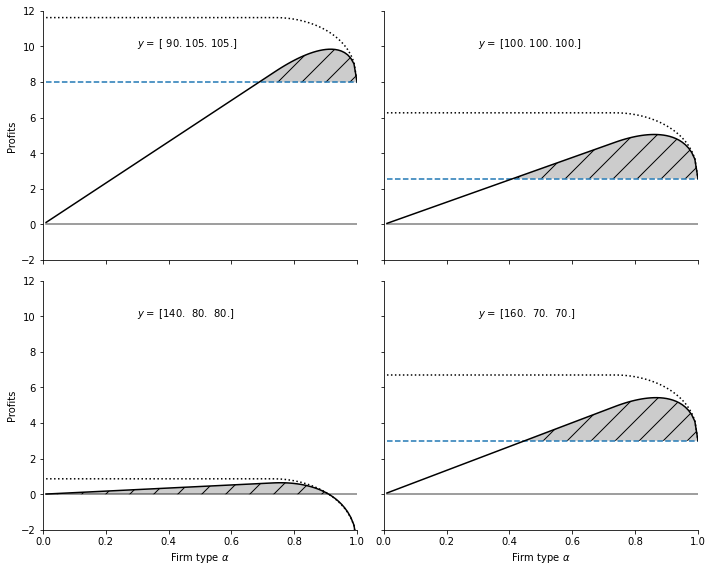

In [5]:
# make figure with subplots
f, ax = plt.subplots(2, 2, sharex=True, figsize=(10,8))
beta = 0.65
rho = 1.05
hybrid_plot(y0=90, beta=beta, rho=rho, ax = ax[0,0])
hybrid_plot(y0=140, beta=beta, rho=rho, ax = ax[1,0])
hybrid_plot(y0=100, beta=beta, rho=rho, ax = ax[0,1])
hybrid_plot(y0=160, beta=beta, rho=rho, ax = ax[1,1])

ax[1,0].set_xlabel(r"Firm type $\alpha$")
ax[0,0].set_ylabel(r"Profits")
ax[1,0].set_ylabel(r"Profits")
ax[0,1].set_yticklabels([])
ax[1,1].set_xlabel(r"Firm type $\alpha$")
ax[1,1].set_yticklabels([])
f.savefig('Figure3.pdf')
f.tight_layout();

## Interactive Plot and gif

In order for the widget sliders to affect the chart you must be running this on a jupyter notebooks server.  If you are viewing this on the web, click on the Rocket icon button above to launch a cloud server service (Binder, or google colab).

In [6]:
interact(hybrid_plot, y0=(50, 200, 5), beta=(0.4, 0.95, 0.05), rho=(0.501, 1.501, 0.1), ax=fixed(None));

interactive(children=(IntSlider(value=100, description='y0', max=200, min=50, step=5), FloatSlider(value=0.65,…

A gif to illustrate how the plot adjusts to parameter changes:

![gif](captured_profit2.gif)